In [148]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from time import sleep
import matplotlib.pyplot as plt

In [69]:
import numpy as np


In [270]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [241]:
# set configuration
sample_size = 50
nr_sample = 20
num_t_steps = 25
step_size = 0.1 * np.pi
t = np.arange(1, num_t_steps+1) * step_size
sample_config = [sample_size, nr_sample]

# classificatiom
test_size, cv = 0.2, 5
cv_config = [test_size, cv]

### Bounded distributions

In [109]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)

In [110]:
ecf_df = dem.get_ecf(bounded_samples, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,0.981380,0.926784,0.839901,0.726570,0.594339,0.451888,0.308391,0.172831,0.053347,-0.043341,...,-0.121130,-0.138667,-0.131174,-0.101061,-0.052418,0.009404,0.078282,0.147869,0.212128,arcsine
1,0.984556,0.939278,0.867240,0.773284,0.663627,0.545353,0.425851,0.312223,0.210743,0.126384,...,0.150201,0.142369,0.148707,0.166284,0.191157,0.218811,0.244636,0.264399,0.274667,arcsine
2,0.983573,0.935368,0.858530,0.758036,0.640320,0.512793,0.383295,0.259523,0.148478,0.055990,...,-0.055343,-0.082199,-0.089415,-0.078646,-0.052855,-0.015972,0.027503,0.072932,0.115955,arcsine


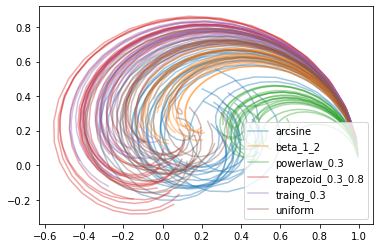

In [111]:
dem.get_ecf_plot(ecf_df,t)

### SVM

In [265]:
num_steps_list = np.arange(2,20,2)
step_size_list = np.arange(0,3,0.1)*np.pi
sample_size_list = [5, 10, 25, 50, 100, 500, 1000]

In [191]:
res_svm = cm.cv_ecf(sample_size_list, step_size_list, num_steps_list, bounded_dists, sample_config, cv_config, 1)

  0%|          | 0/2 [00:00<?, ?it/s]

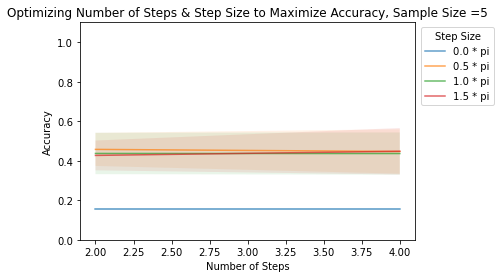

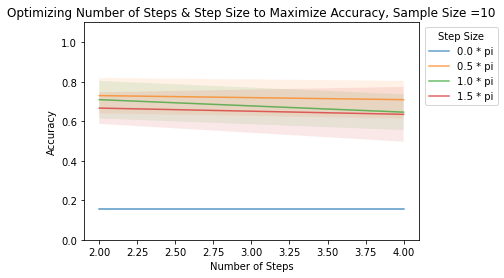

In [232]:
cm.plot_cv_ecf(res_svm)

### Logistic Regression

In [266]:
res_lr = cm.cv_ecf(sample_size_list, step_size_list, num_steps_list, bounded_dists, sample_config, cv_config, 2)

  0%|          | 0/7 [00:00<?, ?it/s]

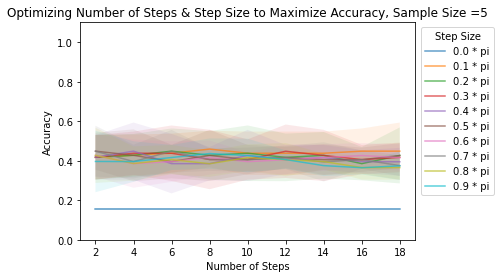

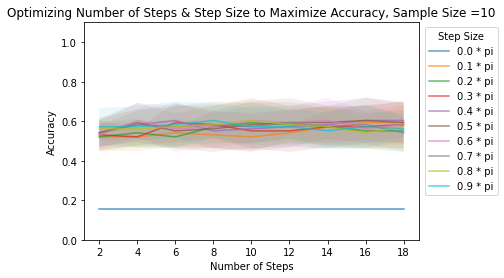

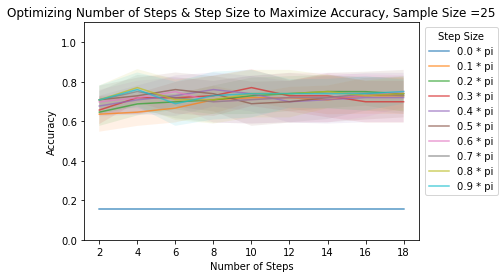

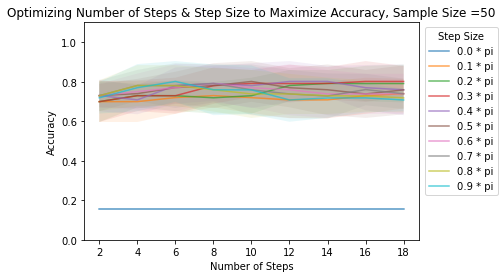

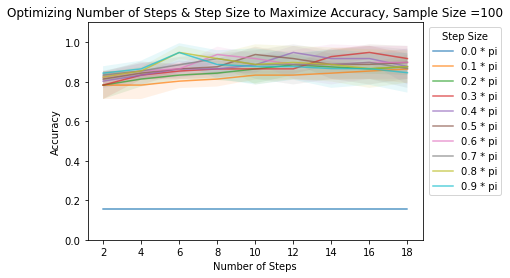

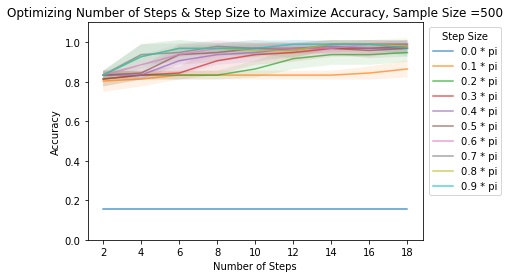

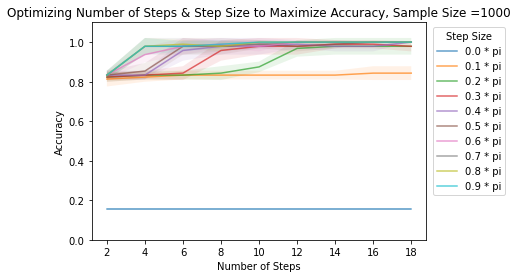

In [272]:
cm.plot_cv_ecf(res_lr)

### Heavytail distributions

In [250]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size, transform = True)

In [251]:
ecf_df = dem.get_ecf(heavytail_samples, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,0.948924,0.809563,0.617767,0.417045,0.242902,0.113142,0.027667,-0.024113,-0.053791,-0.067988,...,0.121631,0.124264,0.124973,0.126908,0.131165,0.134538,0.131207,0.117508,0.096314,cauchy
1,0.930079,0.769341,0.613964,0.513313,0.438251,0.338739,0.213411,0.108789,0.058064,0.040004,...,0.126712,0.076682,0.026433,-0.025745,-0.077110,-0.113448,-0.113508,-0.073815,-0.026876,cauchy
2,0.949181,0.816892,0.649335,0.488560,0.352192,0.237318,0.138993,0.061691,0.012889,-0.010929,...,0.026758,0.059290,0.098738,0.120430,0.123208,0.124691,0.139933,0.165870,0.186462,cauchy


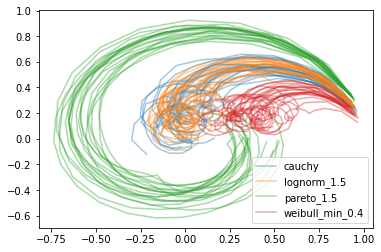

In [252]:
dem.get_ecf_plot(ecf_df, t)

### SVM

In [253]:
num_steps_list = np.arange(2,6,2)
step_size_list = np.arange(0,2,0.5)*np.pi
sample_size_list = [5, 10]

In [263]:
res_svm_ht = cm.cv_ecf(sample_size_list, step_size_list, num_steps_list, heavytail_dists, sample_config, cv_config, 1, transform = True)

  0%|          | 0/2 [00:00<?, ?it/s]

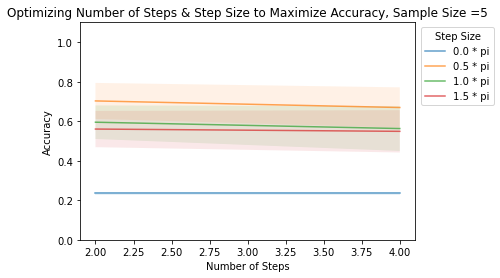

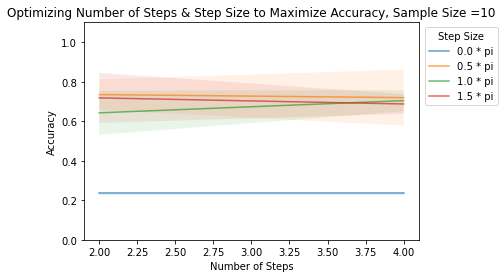

In [264]:
cm.plot_cv_ecf(res_svm_ht)

### Logistic Regression

In [268]:
res_lr_ht = cm.cv_ecf(sample_size_list, step_size_list, num_steps_list, heavytail_dists, sample_config, cv_config, 2, transform=True)

  0%|          | 0/7 [00:00<?, ?it/s]

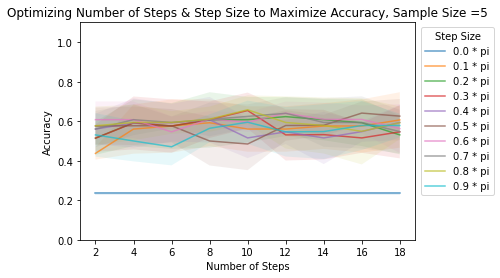

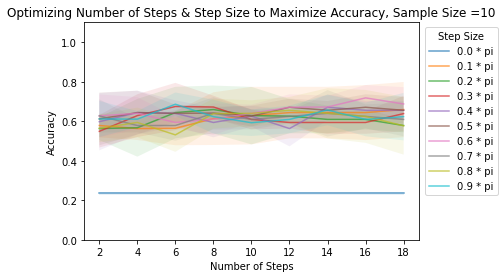

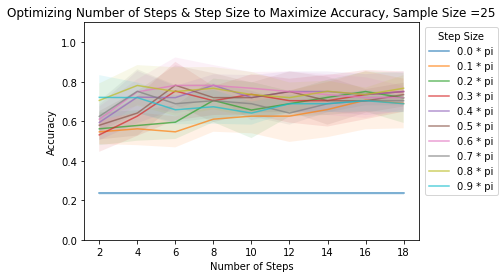

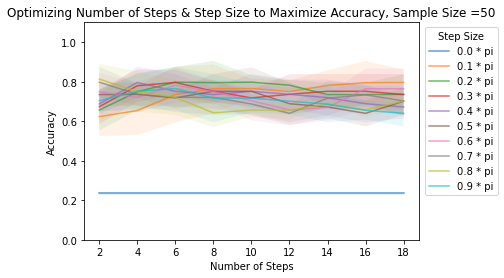

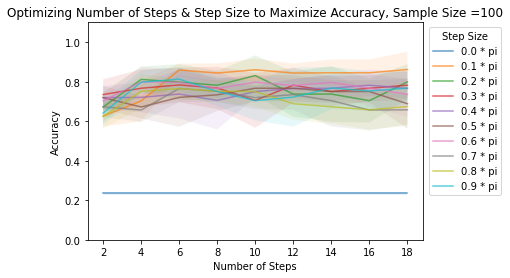

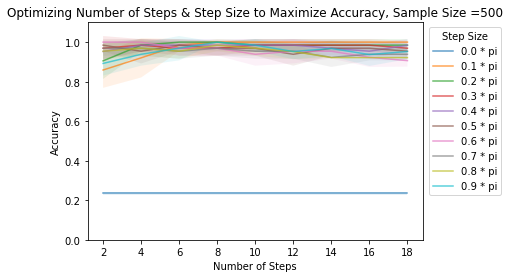

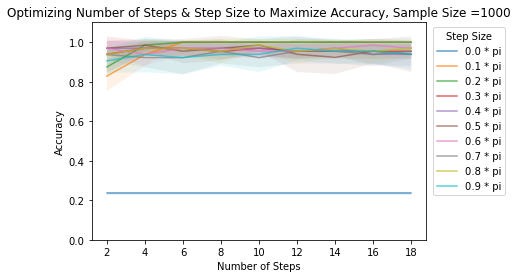

In [271]:
cm.plot_cv_ecf(res_lr_ht)